In [1]:
!pip install umap-learn -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 5.4 MB/s eta 0:00:00


# **Hometask 5**
1.Choose more than one clustering algorithm (you can use any algorithm you can find, but it should be appropriate for your data and initial assumptions)

2.Run them on your data and visualize (You can make classes from target value to check the quality of your results)

3.Try to find some interesting patterns in your data if possible

OR you can have bonus points if you can show code for any clustering algorithm from scratch with all the math (except default K-Means)



Кластеризация поможет выявить разделить молекулы на группы схожих свойств для дальнейшего изучения или применения

In [23]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN, KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import umap.umap_ as umap
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
from ipywidgets import interact
from sklearn.cluster import KMeans

In [47]:
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import OPTICS
from sklearn.cluster import Birch
from yellowbrick.cluster import SilhouetteVisualizer

In [11]:
df = pd.read_csv('/content/df_CPs.csv')

In [4]:
df

,Unnamed: 0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,smiles,gap
0,0,-0.339214,0.442302,0.159721,-0.461903,-0.236782,0.702281,0.176595,0.378853,-0.370039,...,-0.080061,0.067852,-0.039111,0.154440,0.079698,-0.043792,-0.117808,-0.022823,O=CC1CCC2OC2C1,0.2258
1,1,-0.643303,0.098820,0.165701,-0.437282,0.104974,0.426370,0.457961,-0.110241,-0.371135,...,-0.044334,0.051943,-0.048330,0.059093,0.093159,0.036363,0.025190,0.091761,COC12CC=C3CC1C23,0.1826
2,2,0.126477,-0.011759,0.013490,-0.156802,-0.393077,0.036280,0.045197,0.235364,0.210192,...,-0.024181,-0.006624,0.005069,-0.043225,-0.001808,0.049079,-0.079340,0.044904,OC1CCC(=O)C1,0.2209
3,3,-0.078209,-0.031696,0.678240,0.245904,0.196744,0.980741,-0.133933,-0.033095,-0.289892,...,0.106457,0.105640,-0.011042,-0.006389,-0.051015,-0.096002,0.141883,0.029436,N#CC12NC3CNC1C23,0.2368
4,4,-0.135424,-0.594030,-0.330410,-0.079832,0.133053,-0.016324,0.335906,-0.153286,0.355254,...,-0.088894,-0.042282,0.083902,-0.052619,0.028385,-0.080537,-0.009442,-0.135750,CC(=NO)CC(C)(C)C,0.2507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19976,19976,-0.033615,0.437328,0.373794,0.133691,0.419226,-0.151528,-0.095548,0.001703,-0.008845,...,0.071868,-0.029205,0.033890,-0.022481,-0.040726,-0.022581,0.031258,0.030001,c1nc(no1)CO,0.2503
19977,19977,-0.049046,-0.590533,-0.218991,-0.091756,0.087148,-0.033772,-0.129681,-0.096177,-0.394211,...,0.110349,0.148339,-0.173841,-0.032819,0.140679,-0.028995,0.001284,0.006364,C1OC2CC=CC3C1C23,0.2493
19978,19978,0.014199,-0.728073,-0.453850,-0.100943,-0.091309,0.015275,-0.036137,-0.476937,-0.089477,...,-0.026064,-0.007584,0.105254,0.136299,0.096911,0.062190,-0.039858,-0.037964,C[NH+]=C1NCC1C([O-])=O,0.2342
19979,19979,0.889089,0.285766,-0.114927,-0.063618,0.015302,-0.109214,0.455168,0.358017,-0.187704,...,-0.200711,-0.028286,0.086818,0.095097,-0.009952,-0.041632,-0.021918,-0.087378,c1c(coc1N2CC2)O,0.2179


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19981 entries, 0 to 19980
Data columns (total 62 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  19981 non-null  int64  
 1   PC1         19981 non-null  float64
 2   PC2         19981 non-null  float64
 3   PC3         19981 non-null  float64
 4   PC4         19981 non-null  float64
 5   PC5         19981 non-null  float64
 6   PC6         19981 non-null  float64
 7   PC7         19981 non-null  float64
 8   PC8         19981 non-null  float64
 9   PC9         19981 non-null  float64
 10  PC10        19981 non-null  float64
 11  PC11        19981 non-null  float64
 12  PC12        19981 non-null  float64
 13  PC13        19981 non-null  float64
 14  PC14        19981 non-null  float64
 15  PC15        19981 non-null  float64
 16  PC16        19981 non-null  float64
 17  PC17        19981 non-null  float64
 18  PC18        19981 non-null  float64
 19  PC19        19981 non-nul

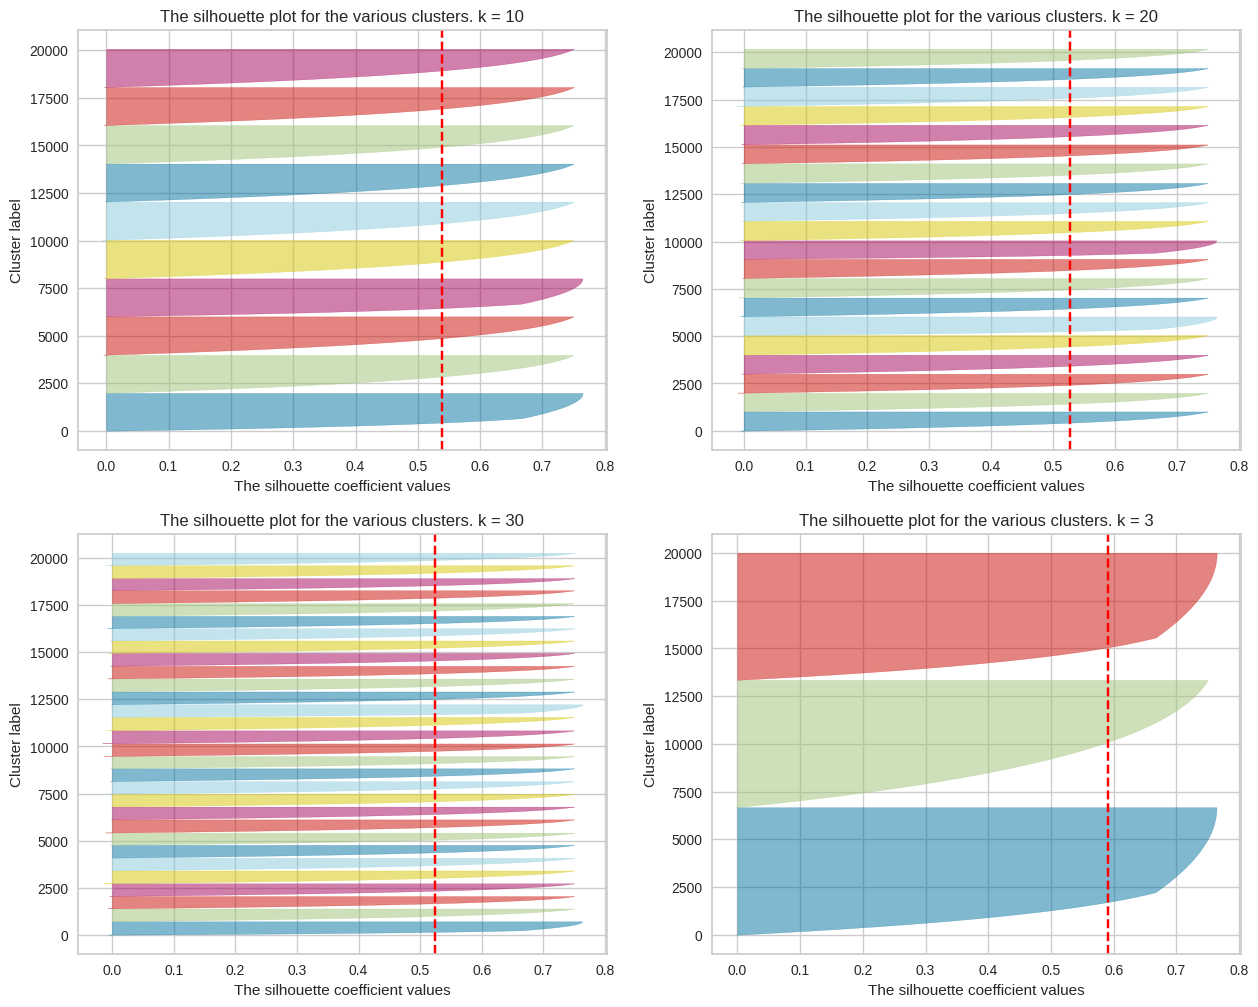

In [15]:
plt.figure(figsize=(15, 12))
for n, k in enumerate([10, 20, 30, 3]):
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=1984)

    '''
    Prepare data for clustering: select appropriate features
    '''
    X = df.iloc[:, :60].values

    '''
    Fit KMeans model to the data
    '''
    km.fit(X)

    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    ax = plt.subplot(2, 2, n + 1)
    ax.set_title(f"The silhouette plot for the various clusters. k = {k}")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax)
    visualizer.fit(X)

Средний коэффициент силуэта около 0.5 указывает на то, что наши данные могут быть разделены на кластеры, но разделение не является очень четким или определенным. У меня слишком много компонент осталось, я решила, что тут кластеризация будет строится по первым 3 компонентам

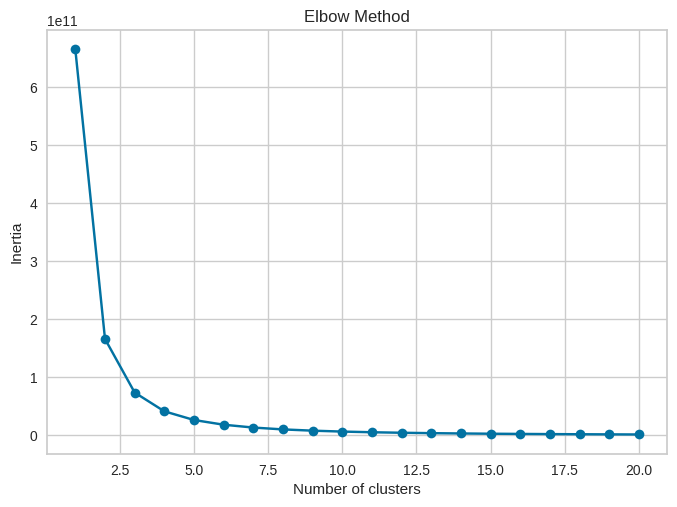

In [27]:
#K-means
#хочу проверить какое колиечество кластеров мы можем построить

# Определяем диапазон количества кластеров, которые хотим проверить можно ли построить
clusters_range = range(1, 21)
inertia = []

# Вычисляем сумму квадратов расстояний от точек до их ближайших центроидов для разного количества кластеров
for k in clusters_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=42)
    kmeans.fit(df.iloc[:, :60])
    inertia.append(kmeans.inertia_)

# Визуализируем метод локтя
plt.plot(clusters_range, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

как видно 5-10 кластеров будут смотреться отлично

In [43]:
# Создаем экземпляр KMeans с заданным количеством кластеров
kmeans = KMeans(n_clusters=5, random_state=1984)

# Производим кластеризацию на основе всех главных компонент
kmeans.fit(df[['PC1', 'PC2', 'PC3']])

# Получаем метки кластеров для каждой точки
labels = kmeans.labels_
df['pred_labels'] = labels

# Создаем scatter plot с использованием Plotly Express
fig = px.scatter(
    df,
    x="PC1",
    y="PC2",
    color="pred_labels",
    width=1200,
    height=800,
    hover_name="smiles",
)
# Добавляем подписи к графику
fig.update_layout(
    xaxis_title="Principal Component 1",
    yaxis_title="Principal Component 2",
    title="Clustering of PC1, PC2, PC3",
)
fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



получилось 5 хороших кластеров

BIRCH - просто интересно выглядит, хочу посмотреть, как разделит наши данные.

Иерархический метод для работы с большими наборами данными.


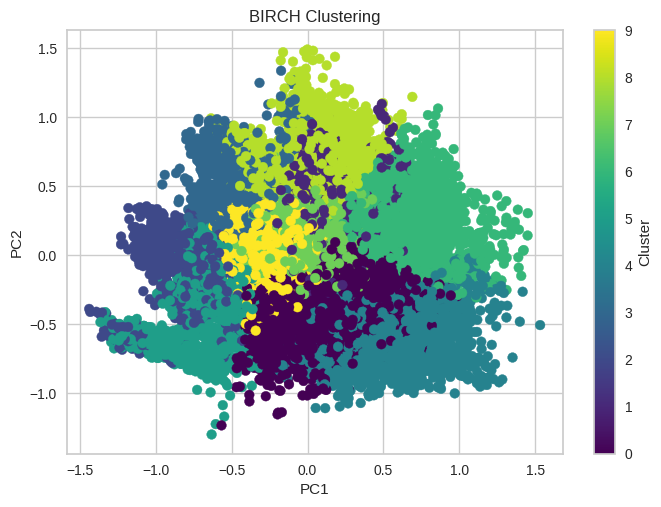

In [44]:
# Создаем экземпляр BIRCH
birch = Birch(n_clusters=10)

# Производим кластеризацию
birch.fit(df[['PC1', 'PC2', 'PC3']])

# Получаем метки кластеров для каждой точки
labels = birch.labels_

# Визуализируем кластеры
plt.scatter(df['PC1'], df['PC2'], c=labels, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('BIRCH Clustering')
plt.colorbar(label='Cluster')
plt.show()

OPTICS - основан на плотности данных, строит ирерахию кластеров, как дерево.
Оценивает плотность каждой точки и упорядочивает их в соотсвествие с какой-то оценкой.

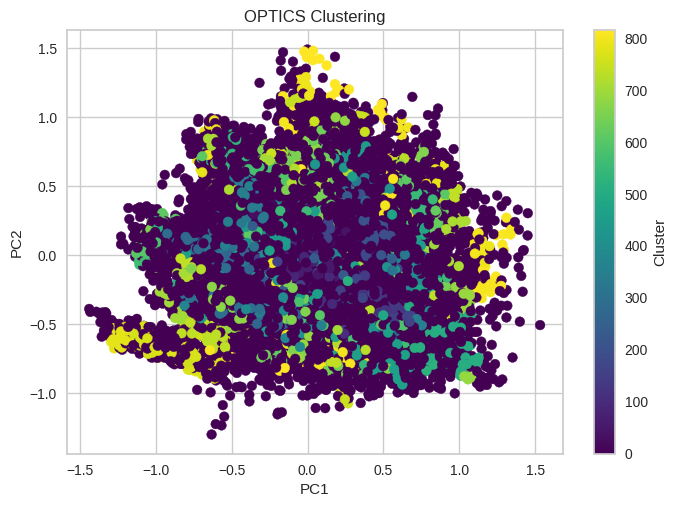

In [46]:
# Создаем экземпляр OPTICS
optics = OPTICS()

# Производим кластеризацию
optics.fit(df[['PC1', 'PC2', 'PC3']])

# Получаем метки кластеров для каждой точки
labels = optics.labels_

# Визуализируем кластеры
plt.scatter(df['PC1'], df['PC2'], c=labels, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('OPTICS Clustering')
plt.colorbar(label='Cluster')
plt.show()